In [62]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
%matplotlib inline

In [63]:
nc = 5
ns = 4
T = 29.7
# T = 29.7
c = np.linspace(11.9, 22.4, nc)
s = np.linspace(-13.8, -21.9, ns)
X, Y = np.meshgrid(c, s)
X, Y

(array([[11.9  , 14.525, 17.15 , 19.775, 22.4  ],
        [11.9  , 14.525, 17.15 , 19.775, 22.4  ],
        [11.9  , 14.525, 17.15 , 19.775, 22.4  ],
        [11.9  , 14.525, 17.15 , 19.775, 22.4  ]]),
 array([[-13.8, -13.8, -13.8, -13.8, -13.8],
        [-16.5, -16.5, -16.5, -16.5, -16.5],
        [-19.2, -19.2, -19.2, -19.2, -19.2],
        [-21.9, -21.9, -21.9, -21.9, -21.9]]))

<ipython-input-64-10c4adcb6121>:38: UserWarning: The following kwargs were not used by contour: 'linewidth'
  hl = pp27.contour(X, Y, orientation_angle(X,Y,T), 8, colors='black', linewidth=.5)


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)>

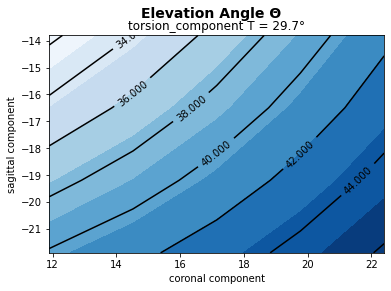

In [64]:
# def orientation_angle(x,y,t):
#     c_a_d, s_a_d, t_a_d, c_a, s_a, t_a, a_tad, a_oa, a_azi, a_ele, a_aor = compute(x, y, t)
#     return a_oa
#
# def elevation_angle(x,y,t):
#     c_a_d, s_a_d, t_a_d, c_a, s_a, t_a, a_tad, a_oa, a_azi, a_ele, a_aor = compute(x, y, t)
#     return a_ele
#
def np_test(x, y, t):
    foo = x * y/ t
    return foo

def orientation_angle(_c_a_d, _s_a_d, _t_a_d):
    c_a = np.radians(_c_a_d)
    s_a = np.radians(_s_a_d)
    t_a = np.radians(_t_a_d)

    h1 = np.sqrt(np.tan(c_a) * np.tan(c_a) + np.tan(s_a) * np.tan(s_a))
    a_tad = np.arctan2(h1, 1)
    a_oa = np.arctan2(np.tan(s_a), np.tan(c_a))
    a_azi = np.arctan2(-(np.sin(a_oa) + np.sin(a_oa - t_a)), (np.cos(a_oa) + np.cos(a_oa - t_a)))
    a_ele = np.arctan2(2 * np.sin(a_tad) * np.cos(0.5 * t_a), np.sin(t_a) * (1 + np.cos(a_tad)))
    a_aor = np.arccos(0.5 * (np.cos(t_a) + np.cos(a_tad) + np.cos(t_a) * np.cos(a_tad) - 1))
    return np.degrees(a_ele)

fig27 = plt.figure()
fig27.suptitle(f'Elevation Angle {chr(int("398", 16))}', fontsize=14, fontweight='bold')
pp27 = fig27.add_subplot(111)
pp27.set_title('torsion_component T = 29.7°')
pp27.set_xlabel('coronal component')
pp27.set_ylabel('sagittal component')

# img = pp27.contourf(X, Y, np_test(X,Y,T), 12, cmap='Blues')
img = pp27.contourf(X, Y, orientation_angle(X,Y,T), 12, cmap='Blues')
    # andere cmaps: hot, summer, winter, spring, gray, Blues
    # 12 ist die Zahl der Farbabstufungen
# hl = pp27.contour(X, Y, np_test(X,Y,T), 8, colors='black', linewidth=.5)
hl = pp27.contour(X, Y, orientation_angle(X,Y,T), 8, colors='black', linewidth=.5)
   # macht Höhenlinien (8 Abstufungen)

plt.clabel(hl, inline=1, fontsize=10)     
   # beschriftet Höhenlinien

plt.xlabel

# fig27.colorbar(img)
   # macht Farbbalken rechts daneben
#
# fig27.show()







